## Chapter 4 - Clustering Methods

### Segment 1 - K-means method

When using K-means remember to:

- Scale your variables

- Look at the _scatterplot_ or the data _table_ to estimate the appropriate number (of centroids) for the K parameter.

In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import sklearn
from sklearn.preprocessing import scale
import sklearn.metrics as skm
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import axis3d
from sklearn import datasets

In [5]:
%matplotlib inline
plt.figure(figsize=(7,4))


<Figure size 700x400 with 0 Axes>

<Figure size 700x400 with 0 Axes>

In [10]:
iris = datasets.load_iris()
X = scale(iris.data)
y = pd.DataFrame(iris.target)
var_names = iris.feature_names
X[:10]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ],
       [-0.53717756,  1.93979142, -1.16971425, -1.05217993],
       [-1.50652052,  0.78880759, -1.34022653, -1.18381211],
       [-1.02184904,  0.78880759, -1.2833891 , -1.3154443 ],
       [-1.74885626, -0.36217625, -1.34022653, -1.3154443 ],
       [-1.14301691,  0.09821729, -1.2833891 , -1.44707648]])

**Building and running the model**

In [22]:
clustering = KMeans(3, random_state=5)
clustering.fit(X)

KMeans(n_clusters=3, random_state=5)

**Plotting your model outputs**

In [23]:
iris_df = pd.DataFrame(iris.data)
iris_df.columns = ['Sepal_Length', 'Sepal_Widgth', 'Petal_Length', 'Petal_Width']
y.columns = ['Targets']

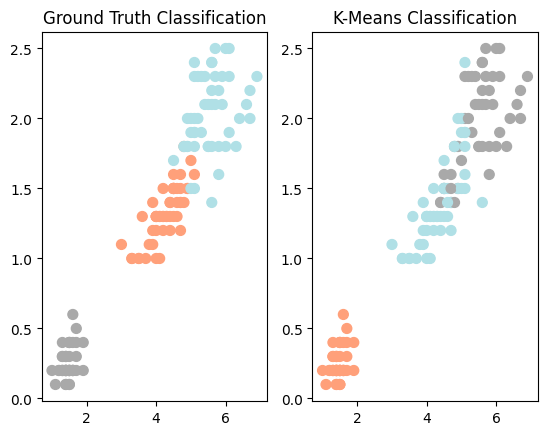

In [26]:
color_theme = np.array(['darkgray', 'lightsalmon', 'powderblue'])
plt.subplot(1,2,1)
plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c=color_theme[iris.target], s=50)
plt.title("Ground Truth Classification")

plt.subplot(1,2,2)
plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c=color_theme[clustering.labels_], s=50)
plt.title("K-Means Classification")

relabel = np.choose(clustering.labels_, [2, 0, 1]).astype(np.int64)

Text(0.5, 1.0, 'K-Means Classification')

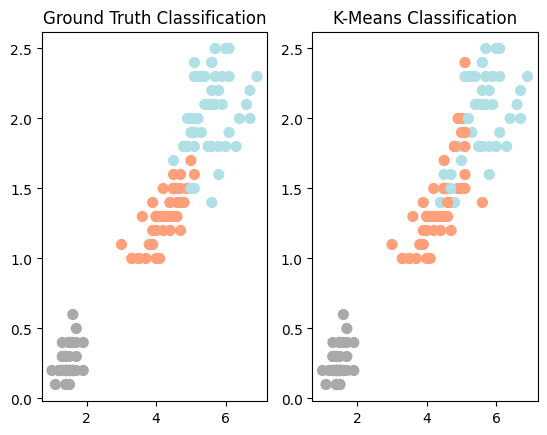

In [27]:
plt.subplot(1,2,1)
plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c=color_theme[iris.target], s=50)
plt.title("Ground Truth Classification")

plt.subplot(1,2,2)
plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c=color_theme[relabel], s=50)
plt.title("K-Means Classification")

**Evaluate your clustering results**

In [28]:
print(classification_report(y, relabel))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.74      0.78      0.76        50
           2       0.77      0.72      0.74        50

    accuracy                           0.83       150
   macro avg       0.83      0.83      0.83       150
weighted avg       0.83      0.83      0.83       150



### Segment 2 - Hierarchial Methods

In [30]:
import seaborn as sb
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster, cophenet
from scipy.spatial.distance import pdist
np.set_printoptions(precision=4, suppress=True)
sb.set_style('whitegrid')


In [31]:
cars = pd.read_csv('mtcars.csv')
cars.rename({"Unnamed: 0": "name"}, axis=1, inplace=True)

In [32]:
X = cars[['mpg', 'disp', 'hp', 'wt']].values

In [53]:
y = cars.iloc[:,9].values


**Using scipy to generate dendrograms**

In [54]:
Z = linkage(X, 'ward')

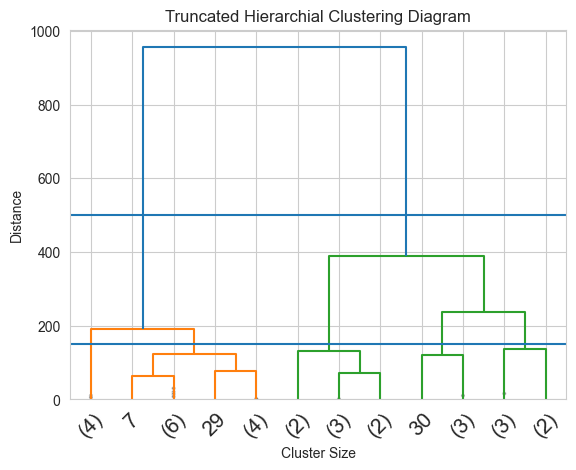

In [55]:
dendrogram(Z, truncate_mode='lastp', p=12, leaf_rotation=45, leaf_font_size=15, show_contracted=True)
plt.title("Truncated Hierarchial Clustering Diagram")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")
plt.axhline(y=500)
plt.axhline(y=150)
plt.show()

**Generating hierarchical clusters**

In [59]:
k=2
hclustering = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
hclustering.fit(X)

skm.accuracy_score(y, hclustering.labels_)

0.78125

In [60]:

hclustering = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='average')
hclustering.fit(X)

skm.accuracy_score(y, hclustering.labels_)

0.78125

In [61]:

hclustering = AgglomerativeClustering(n_clusters=k, affinity='manhattan', linkage='average')
hclustering.fit(X)

skm.accuracy_score(y, hclustering.labels_)

0.71875